In [4]:
import math
import numpy as np
from scipy import signal
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from fuzzy_reg import FuzzyController

## Вариант 9##
Маятник – тело с массой 1 кг, моментом инерции относительно оси a $кг∙м^2$, центр его тяжести находится на расстоянии 5 см от оси, момент силы трения в оси пропорционален угловой скорости вращения с коэффициентом 1;

$$I{d^2\over dt^2}\theta = mgL\theta + M + M^{тр}$$
$$I = I^0+mL^2 = a$$
$$a{d^2\over dt^2}\theta = mgL\theta + M + {d\over dt}\theta$$
$$ (p^2-{p\over a}-{mgL\over a})\theta = {M\over a} $$

### Число лингвистических переменных:
2 входных, 4 выходных.

Входные:
* <<угол велик>>
* <<угол мал>>

Выходные:
* <<сигнал слишком велик>>
* <<сигнал велик>>
* <<сигнал мал>>
* <<сигнал слишком мал>>

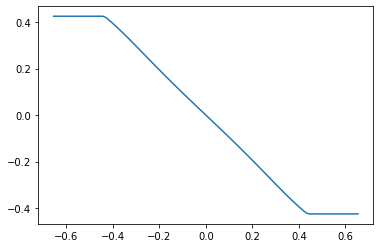

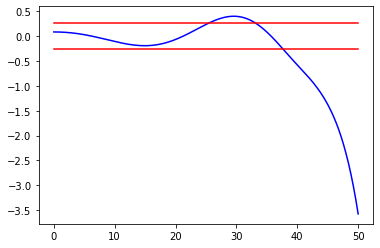

In [7]:
# создаём управляемую систему
dT = 0.1
TotalTime = 20
moments_num = int(TotalTime/dT) + 1
Tin = np.linspace(0, TotalTime, moments_num)
m = 1
g = 9.81
a = 10
L = 0.05
A,B,C,D = signal.tf2ss([1/a], [1, -1/a, -m*g*L/a])
sys_tf = signal.StateSpace(A,B,C,D)
# создаём нечёткий регулятор
fc = FuzzyController()
# выведем зависимость выхода от входа
fc.plot()
# задаём начальные условия
init_angle = 5.0 / 180.0 * math.pi
out_pos = np.zeros(moments_num + 1)
out_pos[0] = init_angle
curr_state = [0, out_pos[0]/0.1]
# для каждого момента времени
for i in range(moments_num):
    # вычислим сигнал нечёткого регулятора
    inp = fc.calc(curr_state[1]*0.1) # передаём угол, а не переменную состояния
    # вычислим выход управляемой системы по входу
    Tout,yout,xout = signal.lsim(sys_tf, [inp,inp], [0,dT], X0=curr_state)
    curr_state = xout[-1]
    out_pos[i+1] = yout[-1]

plt.plot(Tin, out_pos[:-1],'b')
limit = 15 / 180.0 * np.pi
plt.plot([0, TotalTime], [limit, limit], 'r')
plt.plot([0, TotalTime], [-limit, -limit], 'r')
plt.show()